In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import google_streetview
import google_streetview.api
import google_streetview.helpers

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

#### Load in Dataframes

In [9]:
df_a = pd.read_csv('/home/yelhe/scratch/df/df_accident_0_295.csv')
df_p = pd.read_csv('/home/yelhe/scratch/df/df_pseudo_0_792_new.csv')

In [10]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55960 entries, 0 to 55959
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               55960 non-null  int64  
 1   gmedian            55960 non-null  float64
 2   rmedian            55960 non-null  float64
 3   bmedian            55960 non-null  float64
 4   gmean              55960 non-null  float64
 5   rmean              55960 non-null  float64
 6   bmean              55960 non-null  float64
 7   gstd               55960 non-null  float64
 8   rstd               55960 non-null  float64
 9   bstd               55960 non-null  float64
 10  gq25               55960 non-null  float64
 11  gq75               55960 non-null  float64
 12  rq25               55960 non-null  float64
 13  rq75               55960 non-null  float64
 14  bq25               55960 non-null  float64
 15  bq75               55960 non-null  float64
 16  cdmean             559

In [11]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138032 entries, 0 to 138031
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   mask               138032 non-null  int64  
 1   gmedian            138032 non-null  float64
 2   rmedian            138032 non-null  float64
 3   bmedian            138032 non-null  float64
 4   gmean              138032 non-null  float64
 5   rmean              138032 non-null  float64
 6   bmean              138032 non-null  float64
 7   gstd               138032 non-null  float64
 8   rstd               138032 non-null  float64
 9   bstd               138032 non-null  float64
 10  gq25               138032 non-null  float64
 11  gq75               138032 non-null  float64
 12  rq25               138032 non-null  float64
 13  rq75               138032 non-null  float64
 14  bq25               138032 non-null  float64
 15  bq75               138032 non-null  float64
 16  cd

#### For entropy - whole scene

In [13]:
dfae = df_a
dfpe = df_p
# Drop info columns
dfae = dfae.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside'], axis = 1)
dfpe = dfpe.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside'], axis = 1)

In [61]:
dfae.shape, dfpe.shape

((55960, 33), (138032, 33))

In [16]:
rfe = joblib.load("my_random_forest_2_whole7.joblib")

In [32]:
# 1 curb, 2 infrastructure
# 0 building, 3 means_of_transportation, 4 other, 5 sky, 6 vegetation

In [21]:
# rf.fit(X_train3, y_train3)
y_pred_aw = rfe.predict(dfae)
print(np.unique(y_pred_aw, return_counts=True))
y_pred_pw = rfe.predict(dfpe)
print(np.unique(y_pred_pw, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([ 5791,   308,  9166,  1611, 30187,  1764,  7133]))
(array([0, 1, 2, 3, 4, 5, 6]), array([15665,   938, 21583,  3794, 80227,  3345, 12480]))


In [22]:
dfael = dfae
dfael['p'] = y_pred_aw
dfpel = dfpe
dfpel['p'] = y_pred_pw

In [25]:
dfael.columns

Index(['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd',
       'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity',
       'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'leftm', 'rightm', 'topm', 'bottomm', 'p'],
      dtype='object')

In [27]:
dfa1 = df_a
dfp1 = df_p
# dataframe_accident_forentropy_predicted_label
dfa_epl = pd.merge(dfa1, dfael, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])
# dataframe_pseudo_forentropy_predicted_label
dfp_epl = pd.merge(dfp1, dfpel, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])

In [39]:
dfa_epl['p'].unique()

array([5, 2, 6, 0, 3, 4, 1])

In [30]:
dfa_epl.to_csv('/home/yelhe/script/mt/output/pred_accident_label_whole7.csv', index = False)
dfp_epl.to_csv('/home/yelhe/script/mt/output/pred_pseudo_label_whole7.csv', index = False)

#### For entropy of ground scene

In [40]:
dfai = dfa_epl
dfpi = dfp_epl

In [45]:
# Using the infrastructure groups recoginized by model above
# 1 curb, 2 infrastructure
dfai = dfa_epl.loc[(dfa_epl['p'] == 1)|(dfa_epl['p'] == 2)]
dfpi = dfp_epl.loc[(dfp_epl['p'] == 1)|(dfp_epl['p'] == 2)]

In [60]:
dfai.shape, dfpi.shape

((9806, 33), (23307, 33))

In [47]:
rfi = joblib.load("my_random_forest_3_ground7.joblib")

In [48]:
# Drop info columns
dfai = dfai.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'p'], axis = 1)
dfpi = dfpi.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'p'], axis = 1)

In [51]:
# 0 bike lane, 1 curb, 2 ground_sign, 3 manhole, 4 other, 5 pavement, 6 road

In [53]:
# rf.fit(X_train3, y_train3)
y_pred_ai = rfi.predict(dfai)
print(np.unique(y_pred_ai, return_counts=True))
y_pred_pi = rfi.predict(dfpi)
print(np.unique(y_pred_pi, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([  28,  585, 2593,  468, 2913, 1309, 1910]))
(array([0, 1, 2, 3, 4, 5, 6]), array([  58, 1739, 5558,  797, 6632, 3231, 5292]))


In [54]:
dfail = dfai
dfail['p'] = y_pred_ai
dfpil = dfpi
dfpil['p'] = y_pred_pi

In [55]:
dfa1 = df_a
dfp1 = df_p
# dataframe_accident_forentropy_infrastructure_ground_predicted_label
dfa_eipl = pd.merge(dfa1, dfail, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])
# dataframe_pseudo_forentropy_infrastructure_ground_predicted_label
dfp_eipl = pd.merge(dfp1, dfpil, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])

In [57]:
dfa_eipl.to_csv('/home/yelhe/script/mt/output/pred_accident_label_ground7.csv', index = False)
dfp_eipl.to_csv('/home/yelhe/script/mt/output/pred_pseudo_label_ground7.csv', index = False)

#### For curb extraction

In [31]:
dfa = df_a
dfp = df_p
# Drop info columns
dfa = dfa.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm'], axis = 1)
dfp = dfp.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm'], axis = 1)
# Choose only the masks located in the lower part
dfa = dfa.loc[dfa['topm'] >= 300]
dfp = dfp.loc[dfp['topm'] >= 300]
dfa = dfa.drop(['topm'], axis = 1)
dfp = dfp.drop(['topm'], axis = 1)

In [ ]:
#### Load in Random Forest model

In [28]:
rf = joblib.load("my_random_forest_1.joblib")

In [35]:
# rf.fit(X_train3, y_train3)
y_pred_a = rf.predict(dfa)

(array([  270.,     0.,     0.,  6796.,     0.,     0., 20607.,     0.,
            0.,  1608.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

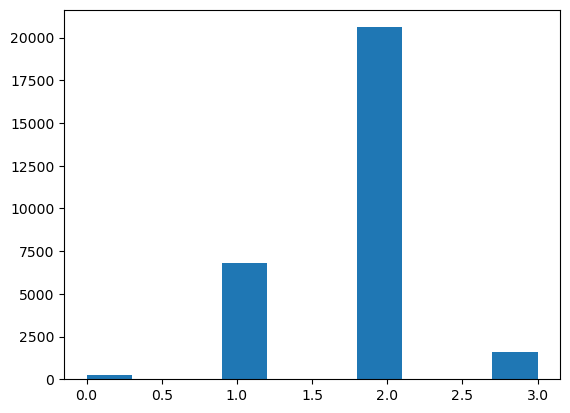

In [40]:
plt.hist(y_pred_a)

In [54]:
np.unique(y_pred_a, return_counts=True)

(array([0, 1, 2, 3]), array([  270,  6796, 20607,  1608]))

(array([0, 1, 2, 3]), array([  972, 16024, 55022,  1094]))

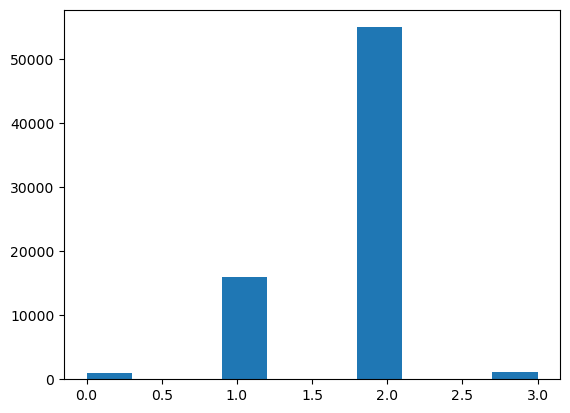

In [55]:
y_pred_p = rf.predict(dfp)
plt.hist(y_pred_p)
np.unique(y_pred_p, return_counts=True)

In [56]:
dfal = dfa
dfal['p'] = y_pred_a
dfpl = dfp
dfpl['p'] = y_pred_p

In [58]:
dfal['p'].unique()

array([1, 2, 3, 0])

In [59]:
dfal.to_csv('/home/yelhe/script/mt/output/pred_accident.csv', index = False)
dfpl.to_csv('/home/yelhe/script/mt/output/pred_pseudo.csv', index = False)

In [60]:
dfal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29281 entries, 1 to 55959
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            29281 non-null  float64
 1   rmedian            29281 non-null  float64
 2   bmedian            29281 non-null  float64
 3   gmean              29281 non-null  float64
 4   rmean              29281 non-null  float64
 5   bmean              29281 non-null  float64
 6   gstd               29281 non-null  float64
 7   rstd               29281 non-null  float64
 8   bstd               29281 non-null  float64
 9   gq25               29281 non-null  float64
 10  gq75               29281 non-null  float64
 11  rq25               29281 non-null  float64
 12  rq75               29281 non-null  float64
 13  bq25               29281 non-null  float64
 14  bq75               29281 non-null  float64
 15  cdmean             29281 non-null  float64
 16  cdstd              29281 no

In [62]:
dfa1 = df_a
dfp1 = df_p
dfa1 = dfa1.loc[dfa1['topm'] >= 300]
dfp1 = dfp1.loc[dfp1['topm'] >= 300]

# # Drop info columns
# dfa = dfa.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm'], axis = 1)
# dfp = dfp.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm'], axis = 1)
# # Choose only the masks located in the lower part
# dfa = dfa.drop(['topm'], axis = 1)
# dfp = dfp.drop(['topm'], axis = 1)

In [64]:
cndfal = list(dfal.columns)
print(cndfal)


['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm', 'p']


In [66]:
# Predicted label
dfa_pl = pd.merge(dfa1, dfal, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm'])
dfp_pl = pd.merge(dfp1, dfpl, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm'])

In [68]:
dfa_pl.to_csv('/home/yelhe/script/mt/output/pred_accident_label.csv', index = False)
dfp_pl.to_csv('/home/yelhe/script/mt/output/pred_pseudo_label.csv', index = False)

In [69]:
ac = pd.read_csv('/home/yelhe/script/mt/output/pred_curb_accident.csv')
pc = pd.read_csv('/home/yelhe/script/mt/output/pred_curb_pseudo.csv')

In [71]:
# Predicted curb in accident points summary
cas = ac.groupby(['id','p']).size().reset_index().rename(columns={0:'count'})
# Predicted curb in pseudo points summary
cps = pc.groupby(['id','p']).size().reset_index().rename(columns={0:'count'})

In [94]:
cps['count'].describe()

count    470.000000
mean       1.631915
std        0.777236
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: count, dtype: float64

([<matplotlib.axis.XTick at 0x14b7f459bd50>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

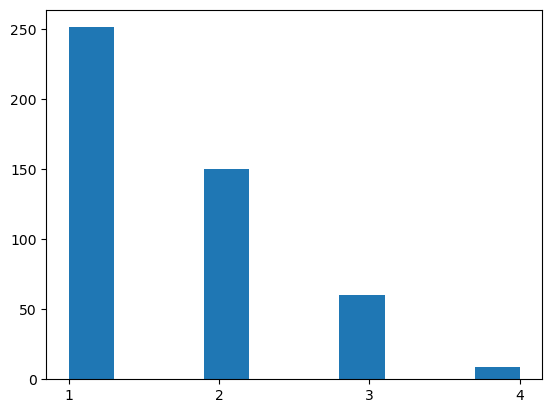

In [92]:
plt.hist(cps['count'], align = 'mid')
plt.xticks(np.arange(1, 5, step=1))
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# fg = plt.figure()
# ax = fg.gca()
# ax.hist(cas['count'])